# Исследование рынка общественного питания Москвы

### Описание проекта

Цель проекта -  исследование рынка перед открытием оригинального кафе, где гостей должны обслуживать роботы, и оформить результаты исследования в презентации для инвесторов.
У нас есть открытые данные о заведениях общественного питания в Москве.

### Оглавление:
- [Описание данных](#Описание-данных)
- [Загрузка данных и подготовка к анализу](#Загрузка-данных-и-подготовка-к-анализу)
- [Анализ данных](#Анализ-данных)
- [Вывод](#Вывод)
- [Презентация](#Презентация)

---

### Описание данных

Источник данных - открытые данные о заведениях общественного питания в Москве.

Таблица `rest_data`:
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

### Загрузка данных и подготовка к анализу

[Вернуться в начало](#Рынок-заведений-общественного-питания-Москвы)

In [1]:
import pandas as pd
from IPython.display import display

import re

from matplotlib import pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

Выведем таблицу:

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')
display(df.head())

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Изучим информацию о таблице:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Пропусков нет, все колонки имеют корректный тип данных.

Изучим столбец с числом посадочных мест:

In [4]:
df['number'].describe().to_frame()

,number
count,15366.000000
mean,59.547182
std,74.736833
min,0.000000
25%,12.000000
50%,40.000000
75%,80.000000
max,1700.000000


Видим заведения, в которых нет посадочных мест. Выведем их количество для каждого типа:

In [5]:
df.query('number == 0')['object_type'].value_counts().to_frame()

,object_type
предприятие быстрого обслуживания,704
кафе,310
закусочная,189
магазин (отдел кулинарии),145
кафетерий,113
буфет,68
ресторан,45
бар,28
столовая,19


Для столовых, кафе и ресторанов отсутствие посадочных мест выглядит странно.

In [6]:
df.query('number == 0 and object_type == "ресторан"').head(10)

,id,object_name,chain,object_type,address,number
1873,79718,Макдоналдс,да,ресторан,"город Москва, поселение Московский, деревня Го...",0
4490,152298,Фудмаркет. Яшечкина,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4491,152299,Фудмаркет. Грачева,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4492,152305,Фудмаркет. Шапиро,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4493,152307,Фудмаркет. Салпагарова,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4501,152255,Фудмаркет.Швыдкой,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4502,152222,Фудмаркет.Паритова,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4503,152224,Фудмаркет. Рогачикова,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4504,152216,Фудмаркет. Галичкин,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
6113,27193,МАКСИМАЛЬНЫЙ РЕСТОРАН,нет,ресторан,"город Москва, Профсоюзная улица, дом 61А",0


Отсутствие посадочных мест можно объяснить соседством нескольких заведений в одном торговом центре, например. Есть определенное количество мест в фудкорте, которые не относятся к отдельному заведению, поэтому отсутствие посадочных мест - не обязательно ошибка сбора данных.

Проверим на дубликаты:

In [7]:
df.duplicated().sum()

0

Отлично!

### Анализ данных

[Вернуться в начало](#Рынок-заведений-общественного-питания-Москвы)

Посчитаем **соотношение видов объектов общественного питания по количеству**:

Построим график:

In [8]:
sns.set_style("darkgrid")

Создадим таблицу, по которой будем сортировать столбцы на графике:

In [9]:
sort = df['object_type'].value_counts().reset_index()
sort.columns = ["type","count"]
#display(sort)

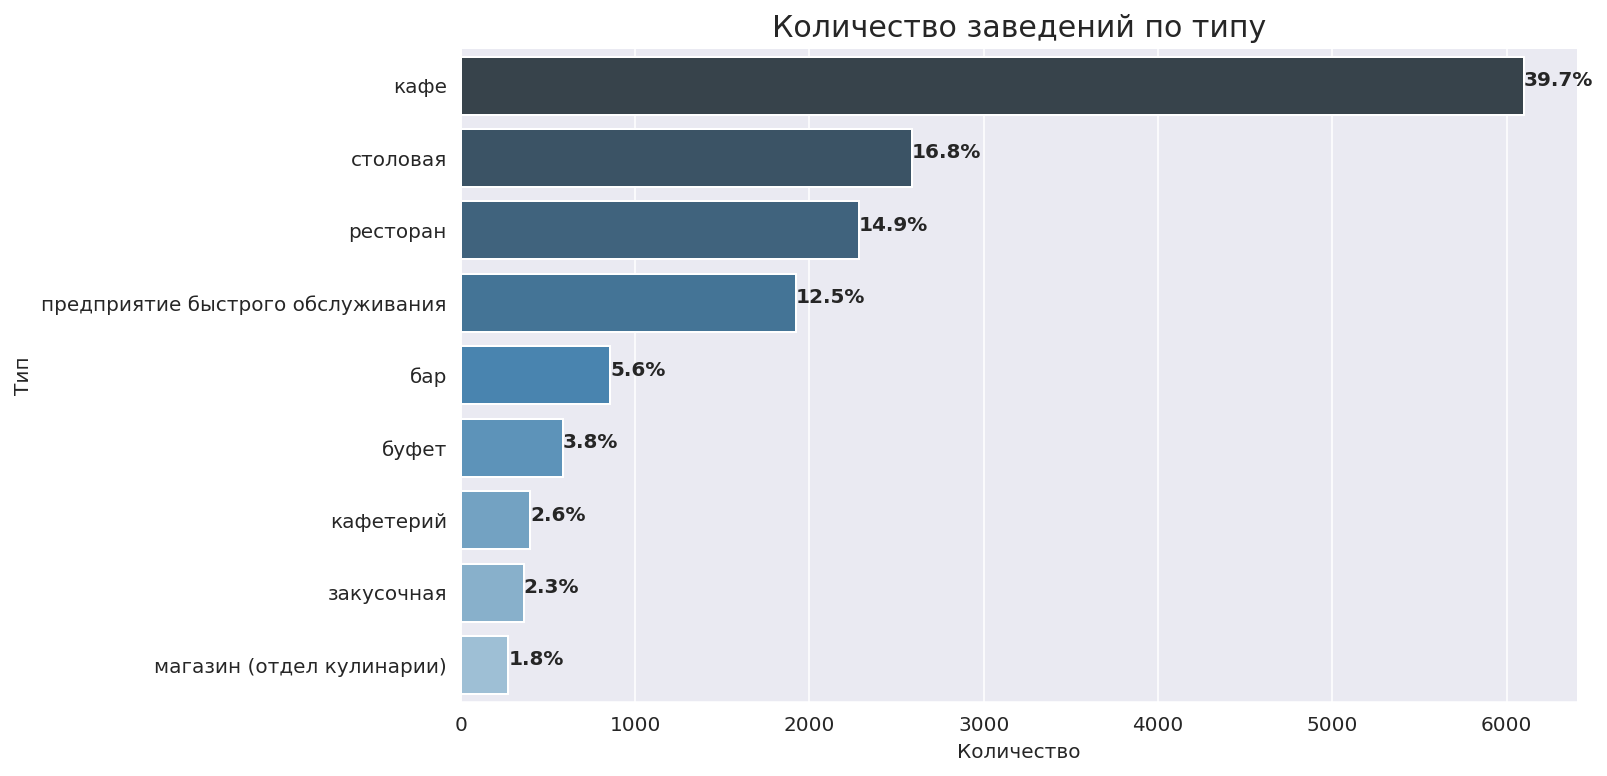

In [10]:
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(y="object_type", data=df, order=sort['type'], palette="Blues_d")

ax.set_title("Количество заведений по типу", fontsize=15)
ax.set_xlabel ("Количество")
ax.set_ylabel ("Тип")

sns.despine()

# вывод %
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, "%.1f%%"% (rect.get_width()/len(df)*100), weight='bold' )

Видим, что наиболее популярные заведения - кафе, столовые, рестораны и предприятия быстрого питания.

Кафе и рестораны это наиболее подходящие форматы для новшеств вроде "роботов-официантов", ведь туда в отличие от столовых приходят не просто поесть, но и хорошо и весело провести время.

Посчитаем **соотношение сетевых и несетевых заведений по количеству**:

In [11]:
df['chain'].value_counts().to_frame()

,chain
нет,12398
да,2968


Построим график:

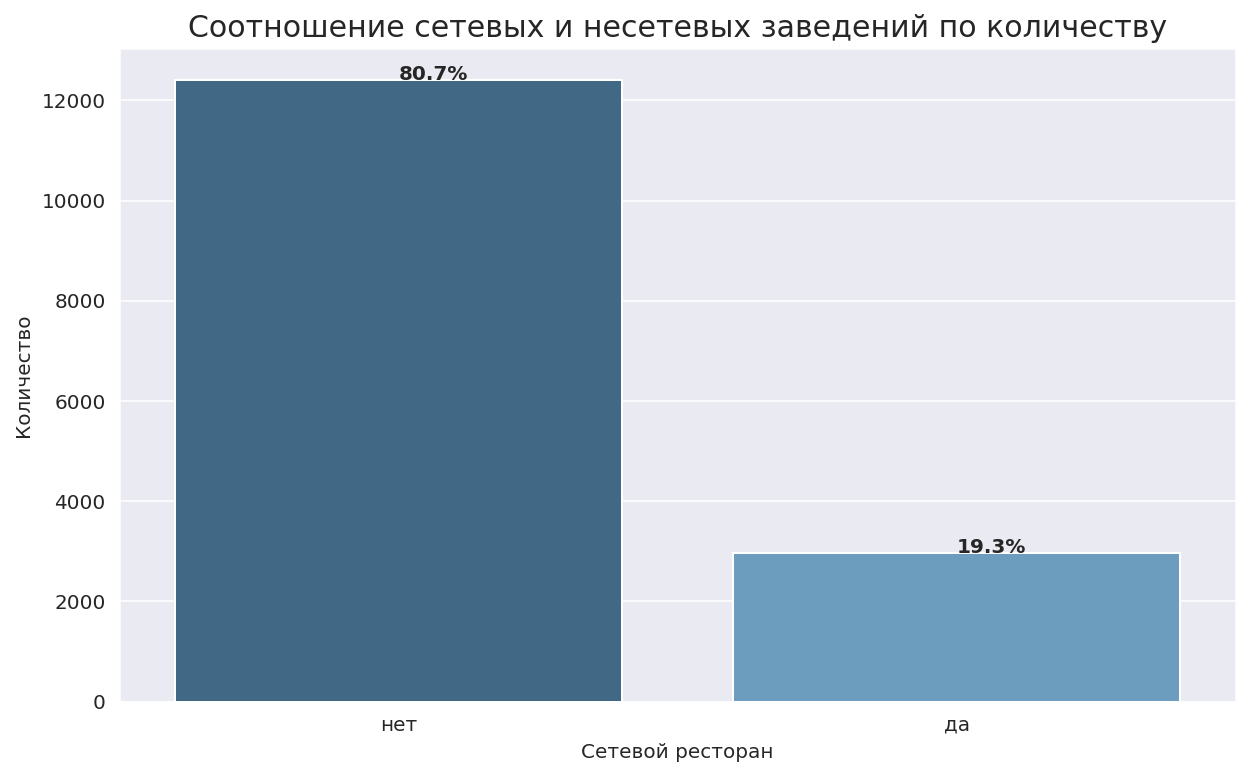

In [12]:
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x="chain", data=df, palette="Blues_d")

ax.set_title("Соотношение сетевых и несетевых заведений по количеству", fontsize=15)
ax.set_xlabel("Сетевой ресторан")
ax.set_ylabel("Количество")

# вывод %
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height(), "%.1f%%"% (rect.get_height()/len(df)*100), weight='bold')

Меньше 20 процентов заведений являются сетевыми.

Узнаем, **для какого вида объекта общественного питания характерно сетевое распространение**:

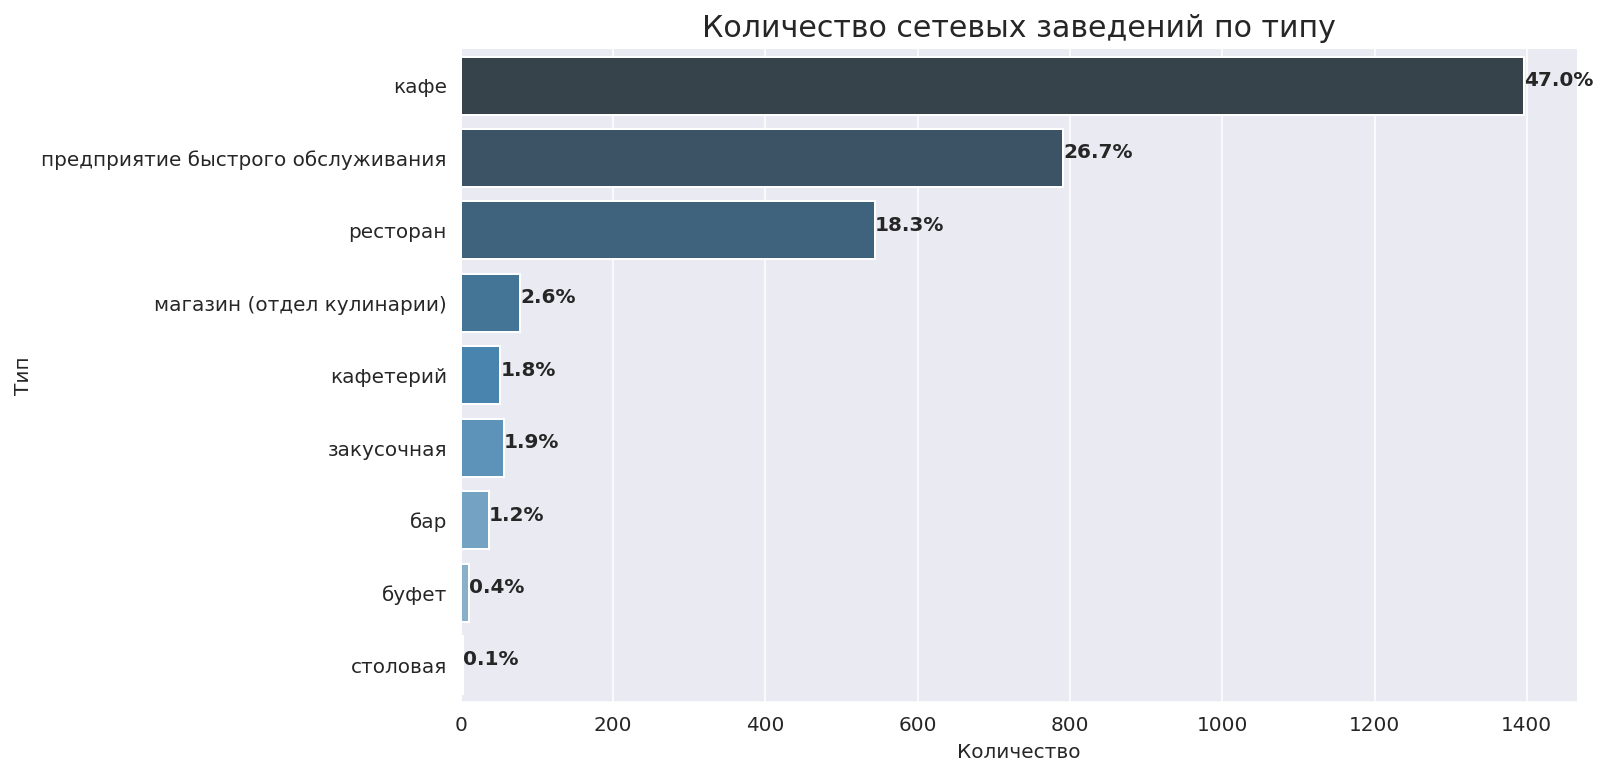

In [13]:
chain = df.query('chain == "да"')

bar,ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(y="object_type", data=chain, palette="Blues_d")

ax.set_title("Количество сетевых заведений по типу", fontsize=15)
ax.set_xlabel ("Количество")
ax.set_ylabel ("Тип")

sns.despine()

# вывод %
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,\
             "%.1f%%"% (rect.get_width()/len(chain)*100), weight='bold')

Видим, что сетевое распространение характерно для кафе, предприятий быстрого обслуживания и ресторанов. Также тоит отметить, что для столовых, которые были в лидерах без учета сети, опустились на последнее место. Значит, почти нет сетевых столовых.

Узнаем, **какое число посадочных мест характерно для сетевых заведений**:

In [14]:
chain_grouped = chain.groupby('object_name').agg({'id': 'count', 'number': 'median'}).reset_index()
chain_grouped.columns = ['object_name', 'rest_cnt', 'seats']
display(chain_grouped.head())

,object_name,rest_cnt,seats
0,Beverly Hills Diner,1,88.0
1,Bierloga,1,75.0
2,Black & White,1,40.0
3,Bocconcino,3,68.0
4,BooBo,1,46.0


Выведем информацию о столбцах:

In [15]:
chain_grouped.describe()

,rest_cnt,seats
count,724.000000,724.000000
mean,4.099448,59.039365
std,12.625954,55.204118
min,1.000000,0.000000
25%,1.000000,20.000000
50%,1.000000,45.000000
75%,2.000000,83.625000
max,155.000000,356.000000


Трудно по этой информации сделать выводы о тренде, выведем отсортированные по столбцам таблицы:

In [16]:
display(chain_grouped.sort_values('rest_cnt', ascending=False).head())
display(chain_grouped.sort_values('seats', ascending=False).head())

,object_name,rest_cnt,seats
30,KFC,155,45.0
702,Шоколадница,141,50.0
418,Макдоналдс,122,75.0
127,Бургер Кинг,122,41.5
195,Домино'с Пицца,86,16.0


,object_name,rest_cnt,seats
651,Темпл Бар,1,356.0
96,БАКИНСКИЙ БУЛЬВАР,1,350.0
689,Чешская пивная «Козловица»,1,306.0
328,Кафе МУ-МУ,1,300.0
714,Ян Примус,1,300.0


Изучим совместное распределение:

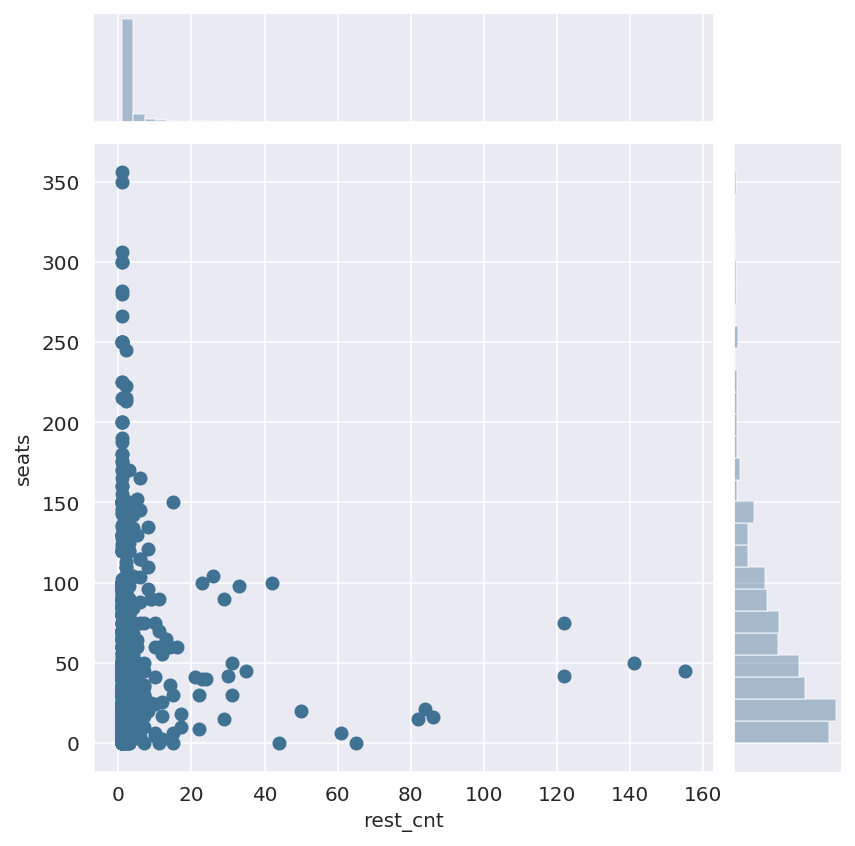

In [17]:
sns.jointplot(x="rest_cnt", y="seats", data=chain_grouped, color='#407294');

Для сетевых заведений характерно: много заведений с небольшим числом посадочных мест в каждом и мало заведений с большим количеством посадочных мест. 

*Вывод*: если заведение сети единственное в городе, лучше, чтобы в нем было достаточно мест, а если заведений много, стоит ограничиться небольшим количеством посадочных мест.

Для каждого вида объекта общественного питания опишем **среднее количество посадочных мест**:

In [18]:
type_grouped = df.groupby('object_type')['number'].mean().reset_index().sort_values('number', ascending=False)
display(type_grouped)

,object_type,number
8,столовая,130.246618
7,ресторан,96.834136
1,буфет,51.129915
0,бар,43.494159
3,кафе,39.716019
6,предприятие быстрого обслуживания,20.552262
4,кафетерий,9.123116
2,закусочная,7.608333
5,магазин (отдел кулинарии),5.589744


Выведем график:

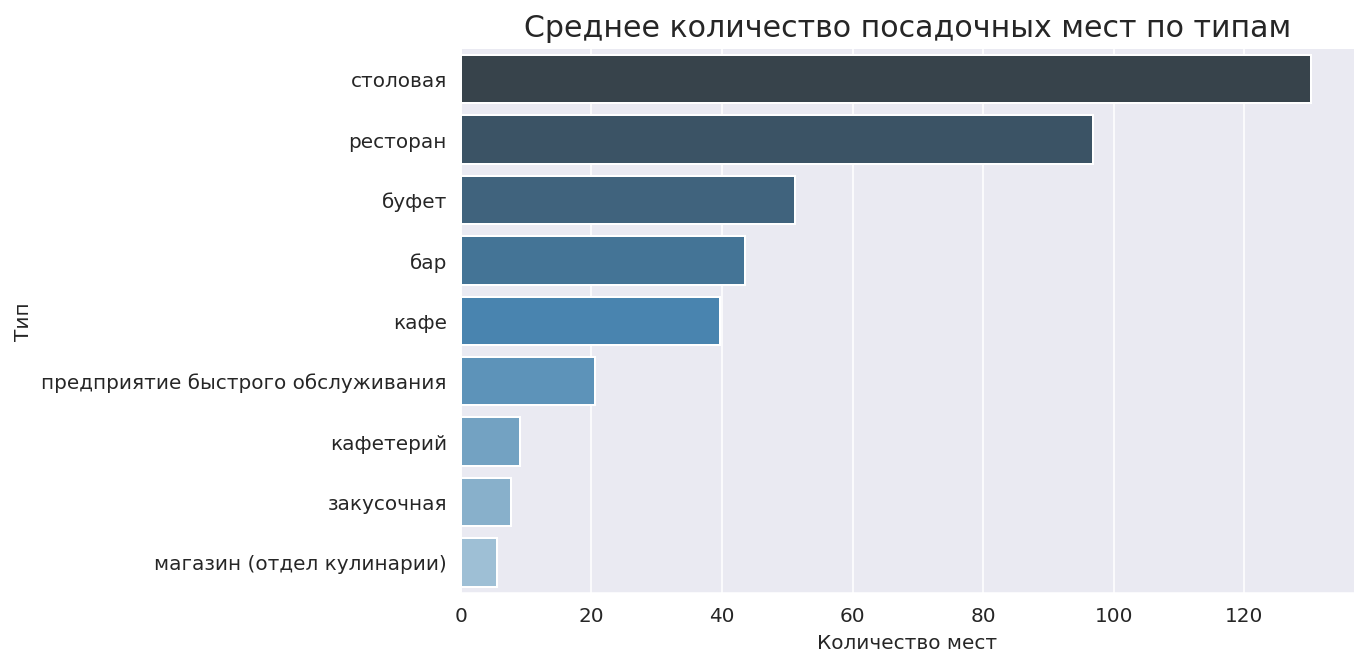

In [19]:
bar, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='number', y='object_type', data=type_grouped, palette="Blues_d")

ax.set_title("Среднее количество посадочных мест по типам", fontsize=15)
ax.set_xlabel ("Количество мест")
ax.set_ylabel ("Тип")

sns.despine()

plt.show()

Построим boxplot и диаграмму рассеивания лля всех типов заведений:

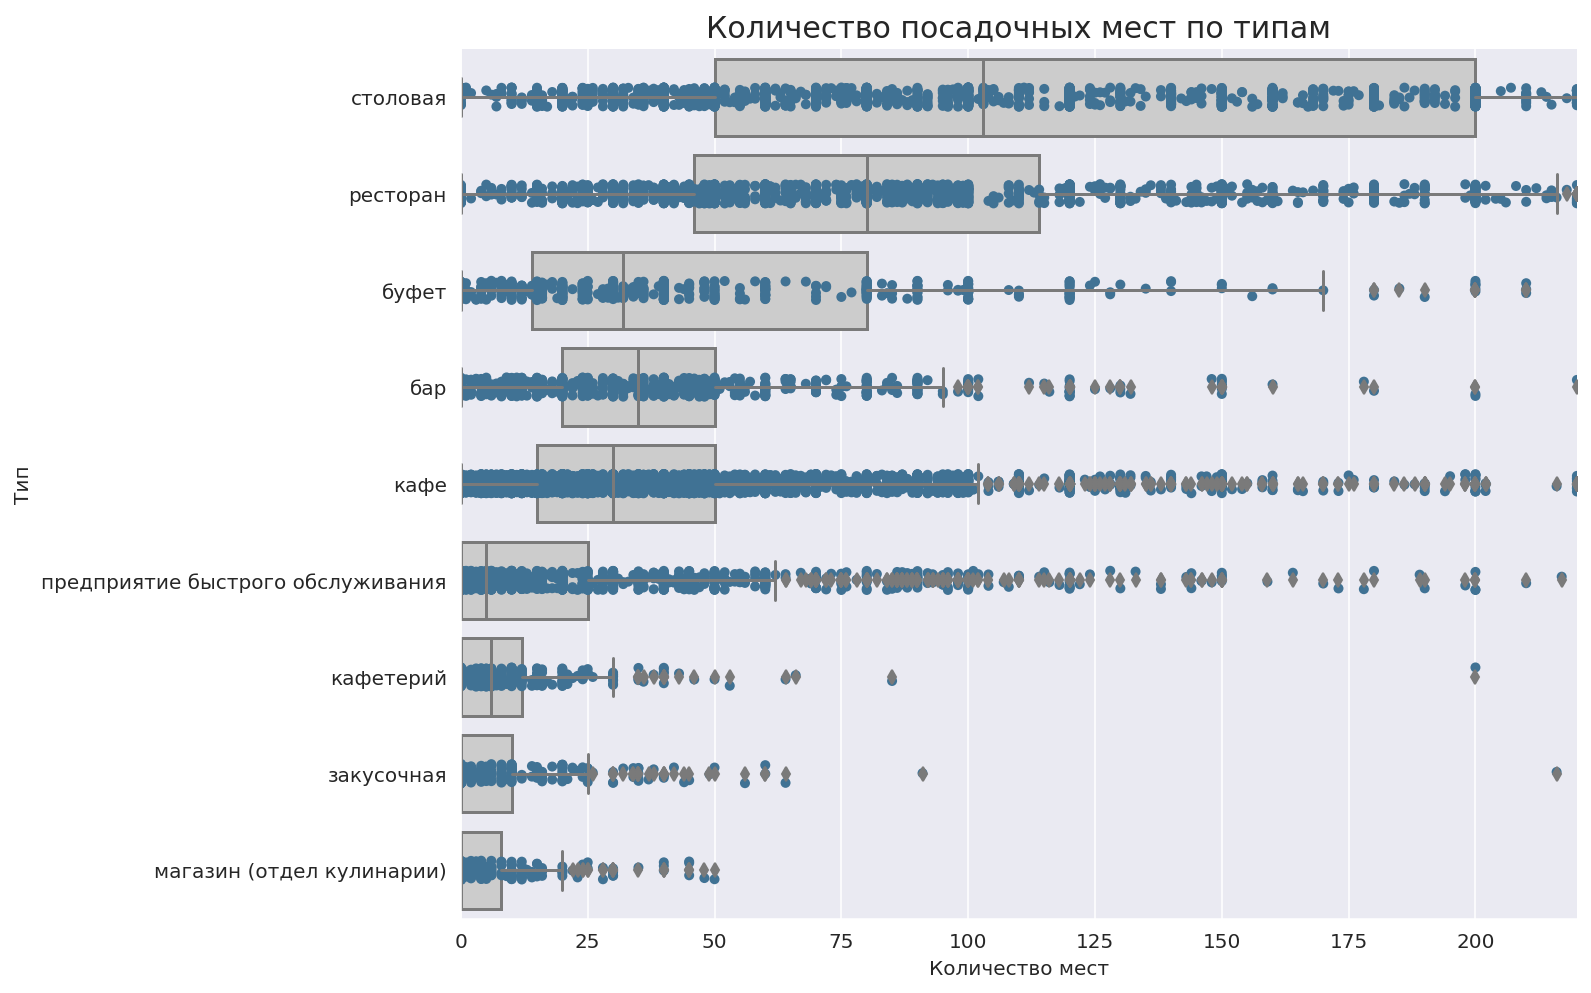

In [20]:
bar, ax = plt.subplots(figsize=(10,8))

ax = sns.boxplot(x='number', y='object_type', data=df, color='0.8', order=type_grouped['object_type'])
ax = sns.stripplot(x='number', y='object_type', data=df, jitter=True, zorder=1, order=type_grouped['object_type'],\
                   color='#407294')

ax.set(xlim=(0, 220))

ax.set_title("Количество посадочных мест по типам", fontsize=15)
ax.set_xlabel ("Количество мест")
ax.set_ylabel ("Тип")

sns.despine()

plt.show()

Самое большое количество посадочных мест предоставляют столовые, рестораны и буфеты. Кафе обычно имеют от 15 до 50 мест, а рестораны от до 200.


Выделим в отдельный столбец **информацию об улице** из столбца `address`.

In [21]:
df['split_address'] = df['address'].str.split(', ')
df.head()

,id,object_name,chain,object_type,address,number,split_address
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,"[город Москва, улица Егора Абакумова, дом 9]"
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,"[город Москва, улица Талалихина, дом 2/1, корп..."
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,"[город Москва, Абельмановская улица, дом 6]"
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,"[город Москва, Абрамцевская улица, дом 1]"
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,"[город Москва, Абрамцевская улица, дом 9, корп..."


Искать улицы будем с помощью регулярных выражений. Запишем само выражение для списка возможных наименований:

In [22]:
street_list = ['улица','переулок','шоссе','проспект','площадь','проезд','аллея',\
               'бульвар','набережная','тупик', 'линия', 'квартал', 'микрорайон']

pattern = ''
for var in street_list:
    #                <...> улица    |     улица <...>    |       <...> улица <...>
    pattern += '[А-я0-9 -ё]+'+var+'$|^'+var+'[А-я0-9 -ё]+|[А-я0-9 -ё]+'+var+'[А-я0-9 -ё]+|'
    
#print(pattern)

Создадим функцию, которая выделяет улицу из ардеса:

In [23]:
def get_street(row):
    for el in row['split_address']:
        st = re.search(pattern, el).group()
        # возвращаем первый el, в котором нашли искомое выражение
        if st != '': return st

Применим ее:

In [24]:
df['street'] = df.apply(get_street, axis=1)

display(df.head())

,id,object_name,chain,object_type,address,number,split_address,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,"[город Москва, улица Егора Абакумова, дом 9]",улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,"[город Москва, улица Талалихина, дом 2/1, корп...",улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,"[город Москва, Абельмановская улица, дом 6]",Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,"[город Москва, Абрамцевская улица, дом 1]",Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,"[город Москва, Абрамцевская улица, дом 9, корп...",Абрамцевская улица


Узнаем, для какой доли заведений улица не найдена: 

In [25]:
len(df.query('street.isna()')) / len(df)

0.021020434726018482

Выведем строки, где улица не найдена и изучим их:

In [26]:
df.query('street.isna()').sample(5)

,id,object_name,chain,object_type,address,number,split_address,street
8589,78179,СТОЛОВАЯ,нет,столовая,"город Москва, поселение Марушкинское, деревня ...",50,"[город Москва, поселение Марушкинское, деревня...",None
6532,23782,КП МГУ столовая 2,нет,столовая,"город Москва, территория Ленинские Горы, дом 1",230,"[город Москва, территория Ленинские Горы, дом 1]",None
13307,198410,Шашлыки Шаурма,нет,закусочная,"город Москва, поселение Сосенское, деревня Сос...",0,"[город Москва, поселение Сосенское, деревня Со...",None
1861,77870,Кафе,нет,кафе,"город Москва, поселение Десеновское, деревня Д...",15,"[город Москва, поселение Десеновское, деревня ...",None
2429,20102,Му-Му,да,кафе,"город Москва, город Зеленоград, корпус 403А",200,"[город Москва, город Зеленоград, корпус 403А]",None


Оставшиеся 2% заведений можно не учитывать в последующем анализе, так как:
- Зеленоград не имеет улиц, только микрорайоны, которые в этом датасете не указаны, а ыделять Зеленоград как улицу некорректно;
- МКАД в данном случае тоже не уместно рассматривать как одну улицу;
- мелкие поселения также не имеют улиц.

Удалим эти записи:

In [27]:
df_new = df.query('street.notna()')

Построим график **топ-10 улиц по количеству объектов общественного питания**.

In [28]:
top10_street = df_new.groupby('street')['id'].count().reset_index().sort_values('id', ascending=False).head(10)
display(top10_street)

,street,id
1428,проспект Мира,204
1015,Профсоюзная улица,183
688,Ленинградский проспект,173
999,Пресненская набережная,167
401,Варшавское шоссе,165
691,Ленинский проспект,148
1424,проспект Вернадского,132
678,Кутузовский проспект,114
601,Каширское шоссе,112
608,Кировоградская улица,110


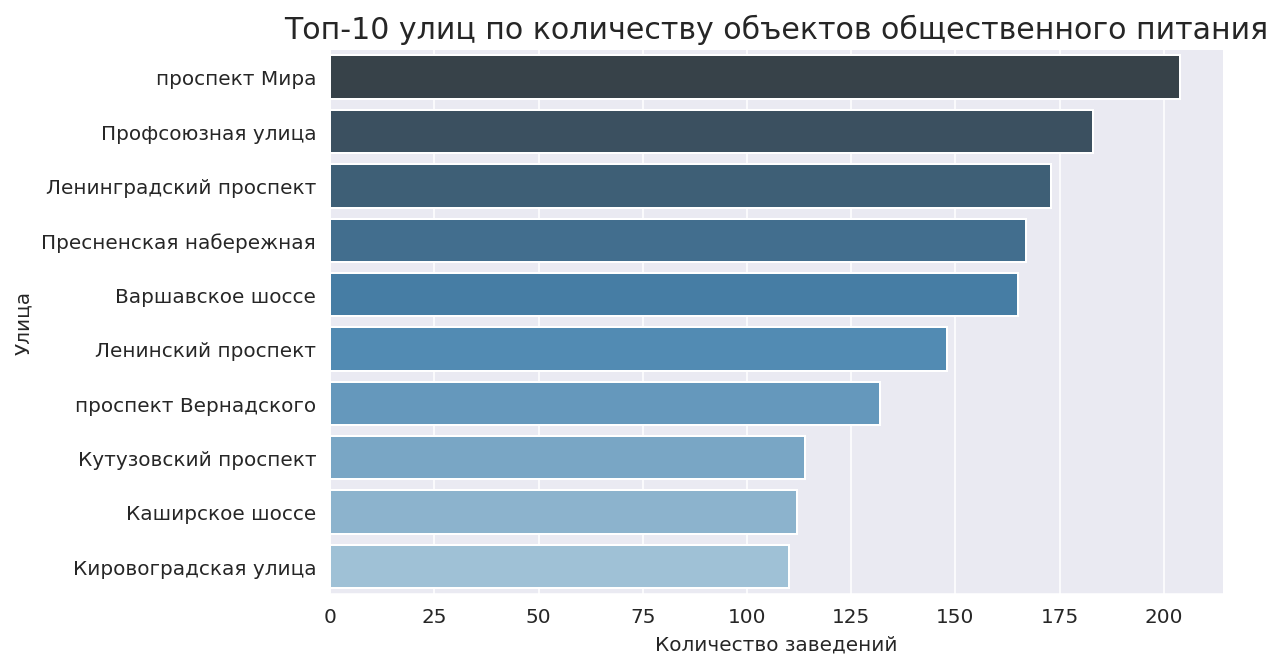

In [29]:
bar, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='id', y='street', data=top10_street, palette="Blues_d")

ax.set_title("Топ-10 улиц по количеству объектов общественного питания", fontsize=15)
ax.set_xlabel ("Количество заведений")
ax.set_ylabel ("Улица")

sns.despine()

plt.show()

Воспользуйтемся внешней информацией и узнаем, **в каких районах Москвы находятся эти улицы**.

Сохраним в переменной `areas` таблицу с информацией об округах и районах для московских улиц:

In [30]:
areas = pd.read_csv('https://raw.githubusercontent.com/Distans/temp/main/mosgaz-streets.csv')
display(areas.head())

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


Соеденим полученные данные с топ-10 улицами:

In [31]:
top10_areas = top10_street.merge(areas, left_on='street', right_on='streetname')
display(top10_areas.head())

,street,id,streetname,areaid,okrug,area
0,проспект Мира,204,проспект Мира,70,СВАО,Алексеевский район
1,проспект Мира,204,проспект Мира,86,СВАО,Ярославский Район
2,проспект Мира,204,проспект Мира,78,СВАО,Район Марьина роща
3,проспект Мира,204,проспект Мира,79,СВАО,Останкинский район
4,проспект Мира,204,проспект Мира,81,СВАО,Район Ростокино


Узнаем, в каких округах чаще всего проходят улицы из топ-10:

In [32]:
top10_areas.groupby('okrug')['street'].count().reset_index().sort_values('street', ascending=False)

,okrug,street
4,ЮАО,14
5,ЮЗАО,14
0,ЗАО,7
2,СВАО,6
1,САО,4
3,ЦАО,3


Юг и юго-запад лидирует с заметным преимуществом, а в центре таких улиц почти нет.

Найдем **число улиц с одним объектом общественного питания**:

In [33]:
only_one = df_new.groupby('street')['id'].count().reset_index().query('id == 1')
print('Улиц с одним объектом общественного питания:', len(only_one))

Улиц с одним объектом общественного питания: 549


Воспользуйтемся внешней информацией и узнаем, в каких районах Москвы находятся эти улицы:

In [34]:
only_one_area = only_one.merge(areas, left_on='street', right_on='streetname')
only_one_area.groupby('okrug')['street'].count().reset_index().sort_values('street', ascending=False)

,okrug,street
6,ЦАО,186
0,ВАО,67
4,СВАО,66
3,САО,55
8,ЮВАО,55
1,ЗАО,45
7,ЮАО,29
5,СЗАО,27
9,ЮЗАО,27
2,Зеленоград,5


Больше всего улиц с единственным объектом питания находтся в центре. Это не удивительно - на коротких центральных улицах не поместится столько заведений, как на проспектах и шоссе из предыдущей таблицы.

Выведем **график распределения количества посадочных мест для улиц с большим количеством объектов общественного питания**:

Найдем список заведений, которые располагаются на улицах из топ-10:

In [35]:
top10_list = top10_street['street']
in_top10 = df_new.query('street.isin(@top10_list)')
display(in_top10.head())

,id,object_name,chain,object_type,address,number,split_address,street
151,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,"[город Москва, Варшавское шоссе, дом 2]",Варшавское шоссе
152,23618,Кафе «Subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,"[город Москва, Варшавское шоссе, дом 7, корпус 1]",Варшавское шоссе
153,155852,Кафе «Ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,"[город Москва, Варшавское шоссе, дом 29]",Варшавское шоссе
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,"[город Москва, Варшавское шоссе, дом 72, корпу...",Варшавское шоссе
155,120658,Выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,"[город Москва, Варшавское шоссе, дом 100]",Варшавское шоссе


Выведем информацию о количестве мест:

In [36]:
in_top10['number'].describe().to_frame()

,number
count,1508.000000
mean,57.965517
std,89.955523
min,0.000000
25%,12.000000
50%,38.500000
75%,75.000000
max,1700.000000


Построим график распределения количества посадочных мест:

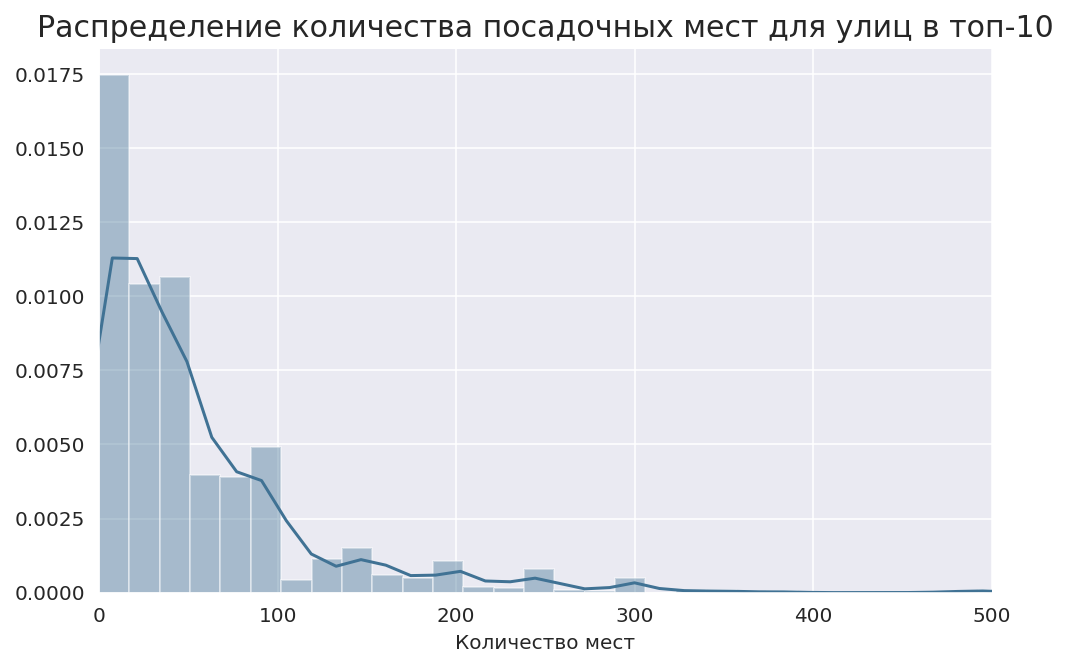

In [37]:
bar, ax = plt.subplots(figsize=(8,5))
ax = sns.distplot(in_top10['number'], color='#407294', bins=100)

ax.set_title("Распределение количества посадочных мест для улиц в топ-10", fontsize=15)
ax.set_xlabel ("Количество мест")
ax.set(xlim=(0, 500))

sns.despine()

plt.show()

Видим, что большая часть заведений, расположенных на самых популярных улицах, имеют меньше 100 посадочных мест. Это разумно, учитывая обилие соседей-конкурентов. 

### Вывод

1. **Краткий обзор проведённой работы:**
    - Загрузили данные, убедились в корректности типов, отсутствии пропусков и дубликатов;
    - провели анализ данных: 
        - исследовали соотношение видов объектов, особенности сетевых заведений;
        - среднее количество посадочных мест;
        - особенности заведений в зависимости от расположения.
2. **Главные выводы:** 
    - наиболее популярные заведения - кафе, столовые, рестораны и предприятия быстрого питания;
    - меньше 20 процентов заведений являются сетевыми;
    - почти нет сетевых столовых - это идея для нового проекта;
    - если сетевое заведение сети единственное в городе, лучше, чтобы в нем было достаточно мест, а если заведений много, стоит ограничиться небольшим количеством посадочных мест;
    - больше всего улиц с единственным объектом питания находятся в центре, а улицы с большим числом заведений - на окраинах, особенно на юге города.
3. **Рекомендации:**
    - вид заведения - *кафе или ресторан*. Это самые популярные заведения вне зависимости от принадлежности к сети;
    - район расположения - *вне центра города на оживленной улице*. Соседство с другими заведениями поможет с привлечением клиентов на начальных порах - случайные прохожие, выбирающие, где поесть, наверняка обратят внимание на "роботов оффициантов";
    - так так заведение будет располагаться на популярной улице и наше заведение будет уникальным, рекомендуемое *количество посадочных мест - от 80 до 100*.

### Презентация

Ссылка на [презентацию](https://drive.google.com/file/d/1D56QMPRS_mLujLSLJ9QNp1Lb_Vo2Q-lh/view?usp=sharing)

[Вернуться в начало](#Рынок-заведений-общественного-питания-Москвы)